## Exploratory Data Analysis - US Food & Drug Administration

    Github - https://github.com/hariomvyas/UMBC/blob/main/Data601/Project3/Vyas_Hariom_Project3.ipynb

#### Data Source 1 – 

    Data Source - https://datadashboard.fda.gov/ora/cd/inspections.htm
    Data Name – U.S. Food & Drug Administration - Inspections Details
    Data was  provided by Professor. It is free to download and legal to access. Documented EDA of Data is not available.
    Data Size – Rows (222697), Columns (8), Size (9.09 MB)

#### Data Source 2 –

    Data Source - https://datadashboard.fda.gov/ora/cd/inspections.htm
    Data Name – U.S. Food & Drug Administration - Inspections Citations Details
    Data was  provided by Professor. It is free to download and legal to access. Documented EDA of Data is not available.
    Data Size – Rows (257624), Columns (14), Size (17.0 MB)

#### Breakdown of the project – 

    1. Loading dataset, Combining two datasets, and Cleaning.
    2. Finding relationship between features of dataset
    3. Presenting Hypothesis and Visulizations based on the it.

In [1]:
## Importing Required Libraries

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

In [2]:
## Creating DataFrames by reading MS Excel Files

df1 = pd.read_excel("39c00379-17c1-4120-96b7-fa372e26f8f0.xlsx")
df2 = pd.read_excel("6481b945-7549-44e5-a65b-8b8eb8b92c87.xlsx")

In [3]:
## File1 Information

print(df1.shape, "\n")
print(df1.columns, "\n")
df1.info()

(222697, 8) 

Index(['Inspection ID', 'FEI Number', 'Legal Name', 'Inspection End Date',
       'Program Area', 'Act/CFR Number', 'Short Description',
       'Long Description'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222697 entries, 0 to 222696
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Inspection ID        222697 non-null  int64         
 1   FEI Number           222697 non-null  int64         
 2   Legal Name           222697 non-null  object        
 3   Inspection End Date  222697 non-null  datetime64[ns]
 4   Program Area         222697 non-null  object        
 5   Act/CFR Number       222516 non-null  object        
 6   Short Description    222697 non-null  object        
 7   Long Description     222694 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 13.6+ MB


In [4]:
## File1 DataFrame

df1.head(15)

,Inspection ID,FEI Number,Legal Name,Inspection End Date,Program Area,Act/CFR Number,Short Description,Long Description
0,1167299,3017202975,PAVmed Inc.,2022-04-15,Devices,21 CFR 820.100(b),Documentation,Corrective and preventive action activities an...
1,1167299,3017202975,PAVmed Inc.,2022-04-15,Devices,21 CFR 820.198(a),Lack of or inadequate complaint procedures,"Procedures for receiving, reviewing, and evalu..."
2,1167002,3006463947,Ximedica LLC,2022-04-13,Devices,21 CFR 820.30(g),Design validation - production units,The design was not validated under defined ope...
3,1167016,3009492128,Exogenesis Corporation,2022-04-12,Devices,21 CFR 820.70(c),Environmental control Lack of or inadequate p...,Procedures to control environmental conditions...
4,1167016,3009492128,Exogenesis Corporation,2022-04-12,Devices,21 CFR 820.250(b),Sampling plans,Sampling plans are not based on valid statisti...
5,1167392,3004217244,Trio Community Meals,2022-04-11,Foods,21 CFR 123.6(b),No HACCP plan,You do not have a written HACCP plan that outl...
6,1167392,3004217244,Trio Community Meals,2022-04-11,Foods,21 CFR 123.9(b)(1),Record retention,Your monitoring records are not maintained at ...
7,1167392,3004217244,Trio Community Meals,2022-04-11,Foods,21 CFR 123.11(c),Sanitation Records,You are not maintaining sanitation control rec...
8,1166559,3006468808,"Metro-Pack, Inc.",2022-04-07,Foods,21 CFR 111.15(d)(2),Pest control measures,You did not take effective measures to exclude...
9,1166559,3006468808,"Metro-Pack, Inc.",2022-04-07,Foods,21 CFR 111.475(b)(1),Written procedures - holding; distributing,You did not make and keep written procedures f...


In [5]:
## File2 Information

print(df2.shape, "\n")
print(df2.columns, "\n")
df2.info()

(257624, 14) 

Index(['FEI Number', 'Legal Name', 'City', 'State', 'Zip', 'Country/Area',
       'Fiscal Year', 'Inspection ID', 'Posted Citations',
       'Inspection End Date', 'Classification', 'Project Area', 'Product Type',
       'FMD-145 Date'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257624 entries, 0 to 257623
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FEI Number           257624 non-null  int64         
 1   Legal Name           257624 non-null  object        
 2   City                 257624 non-null  object        
 3   State                257624 non-null  object        
 4   Zip                  257624 non-null  object        
 5   Country/Area         257624 non-null  object        
 6   Fiscal Year          257624 non-null  int64         
 7   Inspection ID        257624 non-null  int64         
 8   Posted Citations     257624

In [6]:
## File2 DataFrame

df2.head(15)

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,Classification,Project Area,Product Type,FMD-145 Date
0,3017202975,PAVmed Inc.,Foxboro,Massachusetts,02035,United States,2022,1167299,Yes,2022-04-15,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-
1,3017202975,PAVmed Inc.,Foxboro,Massachusetts,02035,United States,2022,1167299,Yes,2022-04-15,No Action Indicated (NAI),Postmarket Assurance: Devices,Devices,-
2,3000138835,Ten Ren Tea and Ginseng Co Inc,New York,New York,10013,United States,2022,1167517,No,2022-04-15,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-
3,3007086121,"Mass Commodities, LLC",Miami,Florida,33131,United States,2022,1166850,No,2022-04-14,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-
4,3020871464,Blood Assurance inc,Hermitage,Tennessee,37076,United States,2022,1167480,No,2022-04-14,No Action Indicated (NAI),Blood and Blood Products,Biologics,-
5,3020871464,Blood Assurance inc,Hermitage,Tennessee,37076,United States,2022,1167480,No,2022-04-14,No Action Indicated (NAI),Vaccines and Allergenic Products,Biologics,-
6,3001877793,Marriott P.R. Management Corporation,San Juan,Puerto Rico,00907,United States,2022,1166891,No,2022-04-13,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-
7,3006463947,Ximedica LLC,Providence,Rhode Island,02907,United States,2022,1167002,Yes,2022-04-13,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-
8,3006463947,Ximedica LLC,Providence,Rhode Island,02907,United States,2022,1167002,Yes,2022-04-13,No Action Indicated (NAI),Postmarket Assurance: Devices,Devices,-
9,3006948344,"Snavely's Mill, Inc.",Palmyra,Pennsylvania,17078,United States,2022,1167076,No,2022-04-13,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-


In [7]:
## Removing Space from Columns Names

df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')

In [8]:
## Merging both DataFrames based on their common columns (FEI Number, Inspection ID, Inspection End Date, Legal Name)

merged_df = pd.merge(df1, df2, how="outer", on=["FEINumber", "InspectionID", "InspectionEndDate", "LegalName"])
merged_df.columns = merged_df.columns.str.replace(' ', '')
merged_df

,InspectionID,FEINumber,LegalName,InspectionEndDate,ProgramArea,Act/CFRNumber,ShortDescription,LongDescription,City,State,Zip,Country/Area,FiscalYear,PostedCitations,Classification,ProjectArea,ProductType,FMD-145Date
0,1167299,3017202975,PAVmed Inc.,2022-04-15,Devices,21 CFR 820.100(b),Documentation,Corrective and preventive action activities an...,Foxboro,Massachusetts,02035,United States,2022,Yes,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-
1,1167299,3017202975,PAVmed Inc.,2022-04-15,Devices,21 CFR 820.100(b),Documentation,Corrective and preventive action activities an...,Foxboro,Massachusetts,02035,United States,2022,Yes,No Action Indicated (NAI),Postmarket Assurance: Devices,Devices,-
2,1167299,3017202975,PAVmed Inc.,2022-04-15,Devices,21 CFR 820.198(a),Lack of or inadequate complaint procedures,"Procedures for receiving, reviewing, and evalu...",Foxboro,Massachusetts,02035,United States,2022,Yes,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-
3,1167299,3017202975,PAVmed Inc.,2022-04-15,Devices,21 CFR 820.198(a),Lack of or inadequate complaint procedures,"Procedures for receiving, reviewing, and evalu...",Foxboro,Massachusetts,02035,United States,2022,Yes,No Action Indicated (NAI),Postmarket Assurance: Devices,Devices,-
4,1167002,3006463947,Ximedica LLC,2022-04-13,Devices,21 CFR 820.30(g),Design validation - production units,The design was not validated under defined ope...,Providence,Rhode Island,02907,United States,2022,Yes,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494299,542811,2515238,"Eurofins QC, Inc.",2008-10-01,NaN,NaN,NaN,NaN,Southampton,Pennsylvania,18966,United States,2009,No,Voluntary Action Indicated (VAI),Drug Quality Assurance,Drugs,-
494300,542816,2410924,"Pfizer, Inc.",2008-10-01,NaN,NaN,NaN,NaN,Brooklyn,New York,11206,United States,2009,No,No Action Indicated (NAI),Drug Quality Assurance,Drugs,-
494301,543569,3004642077,Biograft de Mexico,2008-10-01,NaN,NaN,NaN,NaN,Mexico,-,-,Mexico,2009,No,No Action Indicated (NAI),"Human Cellular, Tissue, and Gene Therapies",Biologics,-
494302,549451,3004642080,Novoinjertos S.C.,2008-10-01,NaN,NaN,NaN,NaN,Mexico,-,-,Mexico,2009,No,No Action Indicated (NAI),"Human Cellular, Tissue, and Gene Therapies",Biologics,-


In [9]:
## Printing Number of values in each dataframes

print(df1.isnull().sum(),"\n")
print(df2.isnull().sum(),"\n")
print(merged_df.isnull().sum())

InspectionID           0
FEINumber              0
LegalName              0
InspectionEndDate      0
ProgramArea            0
Act/CFRNumber        181
ShortDescription       0
LongDescription        3
dtype: int64 

FEINumber            0
LegalName            0
City                 0
State                0
Zip                  0
Country/Area         0
FiscalYear           0
InspectionID         0
PostedCitations      0
InspectionEndDate    0
Classification       0
ProjectArea          0
ProductType          0
FMD-145Date          0
dtype: int64 

InspectionID              0
FEINumber                 0
LegalName                 0
InspectionEndDate         0
ProgramArea          181257
Act/CFRNumber        181456
ShortDescription     181257
LongDescription      181260
City                      0
State                     0
Zip                       0
Country/Area              0
FiscalYear                0
PostedCitations           0
Classification            0
ProjectArea               0


In [10]:
## Value counts of Legal Name 

pd.DataFrame(merged_df['LegalName'].value_counts().head(10))

,LegalName
Boeing Commercial Airplane Company,659
"OneBlood, Inc.",617
CSL Plasma Inc.,600
Vitalant,575
"Delta Air Lines, Inc.",479
"Airgas USA, LLC",397
"Titan Medical Enterprises, Inc. DBA U.S. Apothecary Labs",391
American Red Cross Blood Services,337
"Biomat USA, Inc.",333
American National Red Cross,317


In [11]:
## Value counts of Program Area 

pd.DataFrame(merged_df['ProgramArea'].value_counts())

,ProgramArea
Foods,168969
Devices,72912
Drugs,42906
Veterinary Medicine,8522
Bioresearch Monitoring,6613
Human Tissue for Transplantation,4643
Biologics,4606
Parts 1240 and 1250,2707
Radiologic Health,940
Part 11 Compliance,229


In [12]:
## Value counts of Cities 

pd.DataFrame(merged_df['City'].value_counts().head(10))

,City
Miami,5396
Dallas,3553
Chicago,3526
Houston,3227
Brooklyn,3148
Los Angeles,3083
San Diego,2709
Seattle,2602
Hialeah,2496
Portland,2122


In [13]:
## Value counts of State  

pd.DataFrame(merged_df['State'].value_counts().head(11))

,State
-,67088
California,58299
Florida,39582
New York,27877
Texas,24453
Ohio,16853
Pennsylvania,16203
Illinois,15685
New Jersey,14680
Wisconsin,13346


In [14]:
## Value counts of Country/Area

pd.DataFrame(merged_df['Country/Area'].value_counts().head(10))

,Country/Area
United States,427215
China,5911
India,5230
Canada,3994
Germany,3945
Italy,3714
Japan,3329
Korea (the Republic of),2869
United Kingdom,2628
France,2557


In [15]:
## Value counts of Classifications 

pd.DataFrame(merged_df['Classification'].value_counts())

,Classification
Voluntary Action Indicated (VAI),241112
No Action Indicated (NAI),196127
Official Action Indicated (OAI),57065


In [16]:
## Value counts of Project Areas

pd.DataFrame(merged_df['ProjectArea'].value_counts())

,ProjectArea
Foodborne Biological Hazards,181816
Compliance: Devices,54150
Drug Quality Assurance,45989
"Food Composition, Standards, Labeling and Econ",44362
Postmarket Assurance: Devices,34663
"Monitoring of Marketed Animal Drugs, Feed, and Devices",31665
Bioresearch Monitoring,20892
Blood and Blood Products,18521
Technical Assistance: Food and Cosmetics,14317
Pesticides and Chemical Contaminants,13701


In [17]:
## Value counts of Product Type 

pd.DataFrame(merged_df['ProductType'].value_counts())

,ProductType
Food/Cosmetics,269688
Devices,97806
Drugs,61585
Veterinary,32679
Biologics,31911
Tobacco,635


### 3Ps Problem faced by FDA - Procedure, Pest & Protocol

In [18]:
## Reference - https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [19]:
## Value counts of Short Description & Long Description 

short_df = pd.DataFrame(merged_df['ShortDescription'].value_counts().head(10))
long_df = pd.DataFrame(merged_df['LongDescription'].value_counts().head(10))
display_side_by_side(short_df,long_df, titles=['Short Description','Long Description'])

,ShortDescription
Lack of or inadequate procedures,6099
Sanitation monitoring,5124
Lack of effective pest exclusion,4967
Lack of or inadequate complaint procedures,4341
Screening,3293
Documentation,3287
HACCP plan implementation,3037
"Floors, walls and ceilings",2742
Lack of Written MDR Procedures,2622
Buildings/sanitary,2537


### Pest Control is One of the Biggest Problem in Maryland

In [20]:
## Product Type wise Short Description - Maryland State

byProductType = pd.DataFrame(merged_df.groupby('State').ShortDescription.value_counts())
pd.DataFrame(byProductType.unstack().T['Maryland'].sort_values(ascending=False).head(10))

Maryland
                 ShortDescription                                            
ShortDescription Lack of effective pest exclusion                       115.0
                 Sanitation monitoring                                   86.0
                 Lack of or inadequate procedures                        66.0
                 Precautions against contamination--micro, forei...      60.0
                 Screening                                               59.0
                 Failure to wear                                         59.0
                 HACCP plan implementation                               47.0
                 Harborage areas                                         45.0
                 Not washed/sanitized when appropriate                   44.0
                 Documentation                                           39.0

In [21]:
## Product Type wise Long Description - Maryland State

byProductType = pd.DataFrame(merged_df.groupby('State').LongDescription.value_counts())
pd.DataFrame(byProductType.unstack().T['Maryland'].sort_values(ascending=False).head(10))

Maryland
                LongDescription                                             
LongDescription Failure to provide adequate screening or other ...      59.0
                Effective measures are not being taken to exclu...      55.0
                Procedures for corrective and preventive action...      54.0
                Effective measures are not being taken to exclu...      31.0
                Failure to maintain buildings, fixtures, or oth...      30.0
                You do not have a written HACCP plan that outli...      29.0
                Your HACCP plan does not list one or more criti...      28.0
                You did not take a reasonable measure and preca...      27.0
                Failure to wear beard covers where appropriate.         26.0
                You did not exclude pests from your food plant ...      26.0

### Procedures are not being followed in Biologics, Devices,  Drugs, and Veterinary

In [22]:
## Product Type wise Short Description - Biologics

byProductType = pd.DataFrame(merged_df.groupby('ProductType').ShortDescription.value_counts())
byProductType.unstack().T.sort_values(by=['Biologics'], ascending=False).head(10)

ProductType                                                         Biologics  \
                 ShortDescription                                               
ShortDescription Establish, maintain and follow manufacturing SOPs      985.0   
                 Risk factors, clinical evidence                        365.0   
                 Thorough investigations                                327.0   
                 Testing, screening, donor eligibility procedures       273.0   
                 Concurrent documentation                               232.0   
                 Procedures for all other requirements                  220.0   
                 Required records                                       213.0   
                 Person performing, test results, interpretation        208.0   
                 FD-1572, protocol compliance                           204.0   
                 Biological product deviation report                    203.0   

ProductType                                                         Devices  \
                 ShortDescription                                             
ShortDescription Establish, maintain and follow manufacturing SOPs      1.0   
                 Risk factors, clinical evidence                        1.0   
                 Thorough investigations                                2.0   
                 Testing, screening, donor eligibility procedures       2.0   
                 Concurrent documentation                               3.0   
                 Procedures for all other requirements                  1.0   
                 Required records                                       1.0   
                 Person performing, test results, interpretation        1.0   
                 FD-1572, protocol compliance                           9.0   
                 Biological product deviation report                    4.0   

ProductType                                                          Drugs  \
                 ShortDescription                                            
ShortDescription Establish, maintain and follow manufacturing SOPs     1.0   
                 Risk factors, clinical evidence                       1.0   
                 Thorough investigations                               4.0   
                 Testing, screening, donor eligibility procedures      NaN   
                 Concurrent documentation                              2.0   
                 Procedures for all other requirements                 NaN   
                 Required records                                      1.0   
                 Person performing, test results, interpretation       NaN   
                 FD-1572, protocol compliance                       1339.0   
                 Biological product deviation report                   5.0   

ProductType                                                         Food/Cosmetics  \
                 ShortDescription                                                    
ShortDescription Establish, maintain and follow manufacturing SOPs             NaN   
                 Risk factors, clinical evidence                               NaN   
                 Thorough investigations                                       NaN   
                 Testing, screening, donor eligibility procedures              NaN   
                 Concurrent documentation                                      NaN   
                 Procedures for all other requirements                         NaN   
                 Required records                                              NaN   
                 Person performing, test results, interpretation               NaN   
                 FD-1572, protocol compliance                                  1.0   
                 Biological product deviation report                           NaN   

ProductType                                                         Tobacco  \
                 ShortDescrip

In [23]:
## Product Type wise Long Description - Biologics

byClassification = pd.DataFrame(merged_df.groupby('ProductType').LongDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Biologics'], ascending=False).head(10)

ProductType                                                         Biologics  \
                LongDescription                                                 
LongDescription Donors were not screened by a review of relevan...      197.0   
                HCT/P donors were not determined to be eligible...      181.0   
                Failure to submit a biological product deviatio...      143.0   
                Donors were not screened by a review of relevan...      136.0   
                Failure to perform a thorough investigation and...      129.0   
                Failure to use supplies and reagents in a manne...      110.0   
                An investigation was not conducted in accordanc...      104.0   
                Donor specimens used for testing of communicabl...       95.0   
                An investigation was not conducted in accordanc...       88.0   
                Storage temperatures of HCT/Ps were not recorde...       86.0   

ProductType                                                         Devices  \
                LongDescription                                               
LongDescription Donors were not screened by a review of relevan...      NaN   
                HCT/P donors were not determined to be eligible...      2.0   
                Failure to submit a biological product deviatio...      3.0   
                Donors were not screened by a review of relevan...      1.0   
                Failure to perform a thorough investigation and...      1.0   
                Failure to use supplies and reagents in a manne...      NaN   
                An investigation was not conducted in accordanc...    101.0   
                Donor specimens used for testing of communicabl...      NaN   
                An investigation was not conducted in accordanc...      3.0   
                Storage temperatures of HCT/Ps were not recorde...      2.0   

ProductType                                                         Drugs  \
                LongDescription                                             
LongDescription Donors were not screened by a review of relevan...    1.0   
                HCT/P donors were not determined to be eligible...    NaN   
                Failure to submit a biological product deviatio...    5.0   
                Donors were not screened by a review of relevan...    NaN   
                Failure to perform a thorough investigation and...    NaN   
                Failure to use supplies and reagents in a manne...    NaN   
                An investigation was not conducted in accordanc...  569.0   
                Donor specimens used for testing of communicabl...    NaN   
                An investigation was not conducted in accordanc...  645.0   
                Storage temperatures of HCT/Ps were not recorde...    NaN   

ProductType                                                         Food/Cosmetics  \
                LongDescription                                                      
LongDescription Donors were not screened by a review of relevan...             NaN   
                HCT/P donors were not determined to be eligible...             NaN   
                Failure to submit a biological product deviatio...             NaN   
                Donors were not screened by a review of relevan...             NaN   
                Failure to perform a thorough investigation and...             NaN   
                Failure to use supplies and reagents in a manne...             NaN   
                An investigation was not conducted in accordanc...             NaN   
                Donor specimens used for testing of communicabl...             NaN   
                An investigation was not conducted in accordanc...             1.0   
                Storage temperatures of HCT/Ps were not recorde...             NaN   

ProductType                                                         Tobacco  \
                LongDescription          

In [24]:
## Product Type wise Short Description - Devices

byClassification = pd.DataFrame(merged_df.groupby('ProductType').ShortDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Devices'], ascending=False).head(11)

ProductType                                                          Biologics  \
                 ShortDescription                                                
ShortDescription Lack of or inadequate procedures                         31.0   
                 Lack of or inadequate complaint procedures               20.0   
                 Documentation                                            57.0   
                 Lack of Written MDR Procedures                           22.0   
                 Purchasing controls, Lack of or inadequate proc...       11.0   
                 Lack of or inadequate process validation                 10.0   
                 Nonconforming product,  Lack of or inadequate p...        8.0   
                 Design changes - Lack of or Inadequate Procedures         7.0   
                 Quality audits - Lack of or inadequate procedures         5.0   
                 DMR - not or inadequately maintained                      7.0   
                 Investigation of device failures                          4.0   

ProductType                                                          Devices  \
                 ShortDescription                                              
ShortDescription Lack of or inadequate procedures                     5995.0   
                 Lack of or inadequate complaint procedures           4284.0   
                 Documentation                                        3171.0   
                 Lack of Written MDR Procedures                       2562.0   
                 Purchasing controls, Lack of or inadequate proc...   2298.0   
                 Lack of or inadequate process validation             2025.0   
                 Nonconforming product,  Lack of or inadequate p...   1833.0   
                 Design changes - Lack of or Inadequate Procedures    1478.0   
                 Quality audits - Lack of or inadequate procedures    1451.0   
                 DMR - not or inadequately maintained                 1175.0   
                 Investigation of device failures                     1133.0   

ProductType                                                          Drugs  \
                 ShortDescription                                            
ShortDescription Lack of or inadequate procedures                     50.0   
                 Lack of or inadequate complaint procedures           22.0   
                 Documentation                                        46.0   
                 Lack of Written MDR Procedures                       25.0   
                 Purchasing controls, Lack of or inadequate proc...   24.0   
                 Lack of or inadequate process validation             26.0   
                 Nonconforming product,  Lack of or inadequate p...   14.0   
                 Design changes - Lack of or Inadequate Procedures    11.0   
                 Quality audits - Lack of or inadequate procedures    13.0   
                 DMR - not or inadequately maintained                 10.0   
                 Investigation of device failures                     15.0   

ProductType                                                          Food/Cosmetics  \
                 ShortDescription                                                     
ShortDescription Lack of or inadequate procedures                              20.0   
                 Lack of or inadequate complaint procedures                    15.0   
                 Documentation                                                 12.0   
                 Lack of Written MDR Procedures                                12.0   
                 Purchasing controls, Lack of or inadequate proc...            11.0   
                 Lack of or inadequate process validation                      11.0   
                 Nonconforming product,  Lack of or inadequate p...             4.0   
                 Design changes - Lack of or Inadequate Procedures              2.0   
       

In [25]:
## Product Type wise Long Description - Devices

byClassification = pd.DataFrame(merged_df.groupby('ProductType').LongDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Devices'], ascending=False).head(15)

ProductType                                                         Biologics  \
                LongDescription                                                 
LongDescription Procedures for corrective and preventive action...       18.0   
                Procedures for receiving, reviewing, and evalua...       15.0   
                Procedures to ensure that all purchased or othe...        6.0   
                Procedures have not been adequately established...        5.0   
                Corrective and preventive action activities and...       20.0   
                Procedures for corrective and preventive action...       12.0   
                A process whose results cannot be fully verifie...        7.0   
                Written MDR procedures have not been developed.           4.0   
                Procedures for design change have not been adeq...        3.0   
                Procedures for receiving, reviewing, and evalua...        5.0   
                Procedures for quality audits have not been ade...        2.0   
                Procedures for design control have not been est...        6.0   
                An MDR report was not submitted within 30 days ...       13.0   
                Procedures to ensure that all purchased or othe...        2.0   
                Procedures for training and identifying trainin...        9.0   

ProductType                                                         Devices  \
                LongDescription                                               
LongDescription Procedures for corrective and preventive action...   4475.0   
                Procedures for receiving, reviewing, and evalua...   3275.0   
                Procedures to ensure that all purchased or othe...   1481.0   
                Procedures have not been adequately established...   1286.0   
                Corrective and preventive action activities and...   1274.0   
                Procedures for corrective and preventive action...   1260.0   
                A process whose results cannot be fully verifie...   1169.0   
                Written MDR procedures have not been developed.      1099.0   
                Procedures for design change have not been adeq...   1052.0   
                Procedures for receiving, reviewing, and evalua...   1007.0   
                Procedures for quality audits have not been ade...    841.0   
                Procedures for design control have not been est...    820.0   
                An MDR report was not submitted within 30 days ...    815.0   
                Procedures to ensure that all purchased or othe...    680.0   
                Procedures for training and identifying trainin...    673.0   

ProductType                                                         Drugs  \
                LongDescription                                             
LongDescription Procedures for corrective and preventive action...   34.0   
                Procedures for receiving, reviewing, and evalua...   15.0   
                Procedures to ensure that all purchased or othe...   11.0   
                Procedures have not been adequately established...   11.0   
                Corrective and preventive action activities and...   21.0   
                Procedures for corrective and preventive action...   13.0   
                A process whose results cannot be fully verifie...   14.0   
                Written MDR procedures have not been developed.       7.0   
                Procedures for design change have not been adeq...    4.0   
                Procedures for receiving, reviewing, and evalua...    7.0   
                Procedures for quality audits have not been ade...    7.0   
                Procedures for design control have not been est...   12.0   
                An MDR report was not submitted within 30 days ...    3.0   
                Procedures to ensure that all purchased or othe...   11.0   
                Procedures for training and id

In [26]:
## Product Type wise Short Description - Drugs

byClassification = pd.DataFrame(merged_df.groupby('ProductType').ShortDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Drugs'], ascending=False).head(10)

ProductType                                                          Biologics  \
                 ShortDescription                                                
ShortDescription Procedures not  in writing, fully followed               65.0   
                 FD-1572, protocol compliance                            204.0   
                 Scientifically sound laboratory controls                 32.0   
                 Investigations of discrepancies, failures                32.0   
                 Absence of Written Procedures                            27.0   
                 Case history records- inadequate or inadequate          140.0   
                 Testing and release for distribution                      4.0   
                 Written procedures not established/followed               6.0   
                 Cleaning / Sanitizing / Maintenance                       4.0   
                 Control procedures to monitor and validate perf...       13.0   

ProductType                                                          Devices  \
                 ShortDescription                                              
ShortDescription Procedures not  in writing, fully followed             61.0   
                 FD-1572, protocol compliance                            9.0   
                 Scientifically sound laboratory controls               43.0   
                 Investigations of discrepancies, failures              58.0   
                 Absence of Written Procedures                          46.0   
                 Case history records- inadequate or inadequate          5.0   
                 Testing and release for distribution                   16.0   
                 Written procedures not established/followed            19.0   
                 Cleaning / Sanitizing / Maintenance                    26.0   
                 Control procedures to monitor and validate perf...     37.0   

ProductType                                                           Drugs  \
                 ShortDescription                                             
ShortDescription Procedures not  in writing, fully followed          1587.0   
                 FD-1572, protocol compliance                        1339.0   
                 Scientifically sound laboratory controls             994.0   
                 Investigations of discrepancies, failures            973.0   
                 Absence of Written Procedures                        891.0   
                 Case history records- inadequate or inadequate       796.0   
                 Testing and release for distribution                 669.0   
                 Written procedures not established/followed          640.0   
                 Cleaning / Sanitizing / Maintenance                  632.0   
                 Control procedures to monitor and validate perf...   612.0   

ProductType                                                          Food/Cosmetics  \
                 ShortDescription                                                     
ShortDescription Procedures not  in writing, fully followed                   197.0   
                 FD-1572, protocol compliance                                   1.0   
                 Scientifically sound laboratory controls                     114.0   
                 Investigations of discrepancies, failures                     90.0   
                 Absence of Written Procedures                                168.0   
                 Case history records- inadequate or inadequate                 NaN   
                 Testing and release for distribution                          73.0   
                 Written procedures not established/followed                   97.0   
                 Cleaning / Sanitizing / Maintenance                           73.0   
                 Control procedures to monitor and validate perf...            90.0   

ProductType                                                 

In [27]:
## Product Type wise Long Description - Drugs

byClassification = pd.DataFrame(merged_df.groupby('ProductType').LongDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Drugs'], ascending=False).head(15)

ProductType                                                         Biologics  \
                LongDescription                                                 
LongDescription There are no written procedures for production ...       27.0   
                The responsibilities and procedures applicable ...       43.0   
                An investigation was not conducted in accordanc...       88.0   
                The responsibilities and procedures applicable ...       14.0   
                An investigation was not conducted in accordanc...      104.0   
                There is no written testing program designed to...       14.0   
                There is a failure to thoroughly review any une...       11.0   
                There is no quality control unit.                        16.0   
                Control procedures are not established which va...       11.0   
                There is a failure to thoroughly review any une...       14.0   
                The responsibilities and procedures applicable ...        7.0   
                Batch production and control records do not inc...        5.0   
                Failure to prepare or maintain adequate and acc...       52.0   
                Written production and process control procedur...       35.0   
                Written procedures are not established for the ...        5.0   

ProductType                                                         Devices  \
                LongDescription                                               
LongDescription There are no written procedures for production ...     46.0   
                The responsibilities and procedures applicable ...     32.0   
                An investigation was not conducted in accordanc...      3.0   
                The responsibilities and procedures applicable ...     18.0   
                An investigation was not conducted in accordanc...    101.0   
                There is no written testing program designed to...     23.0   
                There is a failure to thoroughly review any une...     32.0   
                There is no quality control unit.                      14.0   
                Control procedures are not established which va...     19.0   
                There is a failure to thoroughly review any une...     12.0   
                The responsibilities and procedures applicable ...     11.0   
                Batch production and control records do not inc...     13.0   
                Failure to prepare or maintain adequate and acc...      2.0   
                Written production and process control procedur...     16.0   
                Written procedures are not established for the ...      9.0   

ProductType                                                         Drugs  \
                LongDescription                                             
LongDescription There are no written procedures for production ...  891.0   
                The responsibilities and procedures applicable ...  656.0   
                An investigation was not conducted in accordanc...  645.0   
                The responsibilities and procedures applicable ...  570.0   
                An investigation was not conducted in accordanc...  569.0   
                There is no written testing program designed to...  527.0   
                There is a failure to thoroughly review any une...  453.0   
                There is no quality control unit.                   357.0   
                Control procedures are not established which va...  340.0   
                There is a failure to thoroughly review any une...  334.0   
                The responsibilities and procedures applicable ...  329.0   
                Batch production and control records do not inc...  313.0   
                Failure to prepare or maintain adequate and acc...  311.0   
                Written production and process control procedur...  306.0   
                Written procedures are not est

In [28]:
## Product Type wise Short Description - Veterinary

byClassification = pd.DataFrame(merged_df.groupby('ProductType').ShortDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Veterinary'], ascending=False).head(10)

ProductType                                                          Biologics  \
                 ShortDescription                                                
ShortDescription Record keeping                                            NaN   
                 ELDU - producer causes Illegal drug residue               NaN   
                 Drug inventory (control of drugs on premises)             NaN   
                 Expired drugs administered                                NaN   
                 Individual identity of animal(s)                          NaN   
                 ELDU without veterinary client-patient relation...        NaN   
                 Prescribed ELDU - vet causes an illegal drug re...        NaN   
                 Prescribed directions - not followed                      NaN   
                 Procedures not  in writing, fully followed               65.0   
                 Records review prior to shipment for slaughter            NaN   

ProductType                                                          Devices  \
                 ShortDescription                                              
ShortDescription Record keeping                                          NaN   
                 ELDU - producer causes Illegal drug residue             NaN   
                 Drug inventory (control of drugs on premises)           NaN   
                 Expired drugs administered                              NaN   
                 Individual identity of animal(s)                        NaN   
                 ELDU without veterinary client-patient relation...      NaN   
                 Prescribed ELDU - vet causes an illegal drug re...      NaN   
                 Prescribed directions - not followed                    NaN   
                 Procedures not  in writing, fully followed             61.0   
                 Records review prior to shipment for slaughter          NaN   

ProductType                                                           Drugs  \
                 ShortDescription                                             
ShortDescription Record keeping                                         NaN   
                 ELDU - producer causes Illegal drug residue            NaN   
                 Drug inventory (control of drugs on premises)          NaN   
                 Expired drugs administered                             NaN   
                 Individual identity of animal(s)                       NaN   
                 ELDU without veterinary client-patient relation...     NaN   
                 Prescribed ELDU - vet causes an illegal drug re...     NaN   
                 Prescribed directions - not followed                   NaN   
                 Procedures not  in writing, fully followed          1587.0   
                 Records review prior to shipment for slaughter         NaN   

ProductType                                                          Food/Cosmetics  \
                 ShortDescription                                                     
ShortDescription Record keeping                                                 5.0   
                 ELDU - producer causes Illegal drug residue                    NaN   
                 Drug inventory (control of drugs on premises)                  4.0   
                 Expired drugs administered                                     2.0   
                 Individual identity of animal(s)                               NaN   
                 ELDU without veterinary client-patient relation...             1.0   
                 Prescribed ELDU - vet causes an illegal drug re...             NaN   
                 Prescribed directions - not followed                           NaN   
                 Procedures not  in writing, fully followed                   197.0   
                 Records review prior to shipment for slaughter                 NaN   

ProductType                                                 

In [29]:
## Product Type wise Long Description - Veterinary

byClassification = pd.DataFrame(merged_df.groupby('ProductType').LongDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Veterinary'], ascending=False).head(15)

ProductType                                                         Biologics  \
                LongDescription                                                 
LongDescription Causing a residue of an approved human or anima...        NaN   
                Treatment records were not complete.                      NaN   
                Treatment records were not maintained.                    NaN   
                Treatment records were not maintained and compl...        NaN   
                Expired drug(s) were observed in the drug stora...        NaN   
                Use of an animal drug in a manner contrary to l...        NaN   
                You lack an adequate inventory system for deter...        NaN   
                Failure to systematically review treatment reco...        NaN   
                Failure to have a system to control administrat...        NaN   
                You lack an adequate inventory system for deter...        NaN   
                Administration of an approved animal drug in ex...        NaN   
                There are no written procedures for production ...       27.0   
                Administration of an approved animal drug contr...        NaN   
                A prohibited drug was administered in an extral...        NaN   
                You lack an adequate inventory system for deter...        NaN   

ProductType                                                         Devices  \
                LongDescription                                               
LongDescription Causing a residue of an approved human or anima...      NaN   
                Treatment records were not complete.                    NaN   
                Treatment records were not maintained.                  NaN   
                Treatment records were not maintained and compl...      NaN   
                Expired drug(s) were observed in the drug stora...      NaN   
                Use of an animal drug in a manner contrary to l...      NaN   
                You lack an adequate inventory system for deter...      NaN   
                Failure to systematically review treatment reco...      NaN   
                Failure to have a system to control administrat...      NaN   
                You lack an adequate inventory system for deter...      NaN   
                Administration of an approved animal drug in ex...      NaN   
                There are no written procedures for production ...     46.0   
                Administration of an approved animal drug contr...      NaN   
                A prohibited drug was administered in an extral...      NaN   
                You lack an adequate inventory system for deter...      NaN   

ProductType                                                         Drugs  \
                LongDescription                                             
LongDescription Causing a residue of an approved human or anima...    NaN   
                Treatment records were not complete.                  NaN   
                Treatment records were not maintained.                NaN   
                Treatment records were not maintained and compl...    NaN   
                Expired drug(s) were observed in the drug stora...    NaN   
                Use of an animal drug in a manner contrary to l...    NaN   
                You lack an adequate inventory system for deter...    NaN   
                Failure to systematically review treatment reco...    NaN   
                Failure to have a system to control administrat...    NaN   
                You lack an adequate inventory system for deter...    NaN   
                Administration of an approved animal drug in ex...    NaN   
                There are no written procedures for production ...  891.0   
                Administration of an approved animal drug contr...    NaN   
                A prohibited drug was administered in an extral...    NaN   
                You lack an adequate inventory

##### Yes, Looking at the volume of Short & Long Decriptions on Procedures not being followed properly shows our thesis is correct.

### Sanitation & Bugs are the biggest problem in Food Industry

In [30]:
## Product Type wise Short Description - Food/Cosmetics

byClassification = pd.DataFrame(merged_df.groupby('ProductType').ShortDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Food/Cosmetics'], ascending=False).head(10)

ProductType                                        Biologics  Devices  Drugs  \
                 ShortDescription                                              
ShortDescription Sanitation monitoring                   NaN      NaN    4.0   
                 Lack of effective pest exclusion        NaN      3.0   10.0   
                 Screening                               NaN      3.0    8.0   
                 HACCP plan implementation               NaN      NaN    4.0   
                 Floors, walls and ceilings              NaN      NaN    2.0   
                 Buildings/sanitary                      NaN      NaN    3.0   
                 Food safety hazards                     NaN      NaN    1.0   
                 Develop FSVP                            NaN      NaN    NaN   
                 Critical control points                 NaN      NaN    3.0   
                 Critical limits                         NaN      NaN    NaN   

ProductType                                        Food/Cosmetics  Tobacco  \
                 ShortDescription                                            
ShortDescription Sanitation monitoring                     5073.0      NaN   
                 Lack of effective pest exclusion          4854.0      NaN   
                 Screening                                 3230.0      NaN   
                 HACCP plan implementation                 3020.0      NaN   
                 Floors, walls and ceilings                2701.0      NaN   
                 Buildings/sanitary                        2499.0      NaN   
                 Food safety hazards                       2203.0      NaN   
                 Develop FSVP                              2166.0      NaN   
                 Critical control points                   2092.0      NaN   
                 Critical limits                           2073.0      NaN   

ProductType                                        Veterinary  
                 ShortDescription                              
ShortDescription Sanitation monitoring                   47.0  
                 Lack of effective pest exclusion       100.0  
                 Screening                               52.0  
                 HACCP plan implementation               13.0  
                 Floors, walls and ceilings              39.0  
                 Buildings/sanitary                      35.0  
                 Food safety hazards                     10.0  
                 Develop FSVP                            71.0  
                 Critical control points                 10.0  
                 Critical limits                          8.0

<AxesSubplot:xlabel='None,ShortDescription'>

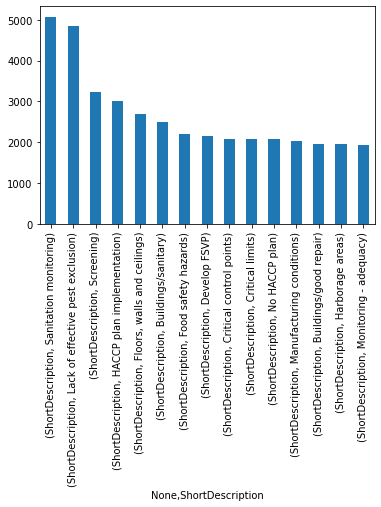

In [31]:
## Bar-graph Showing biggest problems found during Food/Cosmetic Inspection

byClassification.unstack().T['Food/Cosmetics'].sort_values(ascending=False).head(15).plot(kind='bar')

In [32]:
## Product Type wise Long Description - Food/Cosmetics

byClassification = pd.DataFrame(merged_df.groupby('ProductType').LongDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Food/Cosmetics'], ascending=False).head(10)

ProductType                                                         Biologics  \
                LongDescription                                                 
LongDescription Failure to provide adequate screening or other ...        NaN   
                Failure to maintain buildings, fixtures, or oth...        NaN   
                Your HACCP plan does not list the food safety h...        NaN   
                Effective measures are not being taken to exclu...        NaN   
                You did not develop an FSVP.                              NaN   
                Your HACCP plan does not list one or more criti...        NaN   
                You do not have a written HACCP plan that outli...        NaN   
                All reasonable precautions are not taken to ens...        NaN   
                Effective measures are not being taken to exclu...        NaN   
                Your HACCP plan lists a critical limit that doe...        NaN   

ProductType                                                         Devices  \
                LongDescription                                               
LongDescription Failure to provide adequate screening or other ...      3.0   
                Failure to maintain buildings, fixtures, or oth...      NaN   
                Your HACCP plan does not list the food safety h...      NaN   
                Effective measures are not being taken to exclu...      3.0   
                You did not develop an FSVP.                            NaN   
                Your HACCP plan does not list one or more criti...      NaN   
                You do not have a written HACCP plan that outli...      NaN   
                All reasonable precautions are not taken to ens...      1.0   
                Effective measures are not being taken to exclu...      NaN   
                Your HACCP plan lists a critical limit that doe...      NaN   

ProductType                                                         Drugs  \
                LongDescription                                             
LongDescription Failure to provide adequate screening or other ...    8.0   
                Failure to maintain buildings, fixtures, or oth...    3.0   
                Your HACCP plan does not list the food safety h...    1.0   
                Effective measures are not being taken to exclu...    3.0   
                You did not develop an FSVP.                          NaN   
                Your HACCP plan does not list one or more criti...    3.0   
                You do not have a written HACCP plan that outli...    2.0   
                All reasonable precautions are not taken to ens...    NaN   
                Effective measures are not being taken to exclu...    NaN   
                Your HACCP plan lists a critical limit that doe...    NaN   

ProductType                                                         Food/Cosmetics  \
                LongDescription                                                      
LongDescription Failure to provide adequate screening or other ...          3230.0   
                Failure to maintain buildings, fixtures, or oth...          2499.0   
                Your HACCP plan does not list the food safety h...          2203.0   
                Effective measures are not being taken to exclu...          2179.0   
                You did not develop an FSVP.                                2166.0   
                Your HACCP plan does not list one or more criti...          2092.0   
                You do not have a written HACCP plan that outli...          1859.0   
                All reasonable precautions are not taken to ens...          1796.0   
                Effective measures are not being taken to exclu...          1644.0   
                Your HACCP plan lists a critical limit that doe...          1593.0   

ProductType                                                         Tobacco  \
                LongDescription          

##### Yes, Looking at the volume of Short & Long Decriptions on Procedures not being followed properly shows our thesis is correct.

### Storage is one of main issues of Tobacco Industry

In [33]:
## Product Type wise Short Description - Tobacco

byClassification = pd.DataFrame(merged_df.groupby('ProductType').ShortDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Tobacco'], ascending=False).head(10)

ProductType                                            Biologics  Devices  \
                 ShortDescription                                           
ShortDescription Harborage areas                             NaN      NaN   
                 Storage requirements                        NaN      NaN   
                 Sufficient space                            NaN      1.0   
                 "Use ONLY with timer" label                 NaN      3.0   
                 15 day reporting timeframe                  5.0      2.0   
                 15 minute interval (S)                      NaN      NaN   
                 24 hour retrieval of offsite records        NaN      NaN   
                 30-day sponsor notification to FDA          NaN      1.0   
                 50 mm classification warning                NaN      6.0   
                 60 day updates                              NaN      NaN   

ProductType                                            Drugs  Food/Cosmetics  \
                 ShortDescription                                              
ShortDescription Harborage areas                         4.0          1960.0   
                 Storage requirements                    1.0          1283.0   
                 Sufficient space                        1.0          1139.0   
                 "Use ONLY with timer" label             NaN             NaN   
                 15 day reporting timeframe              NaN             NaN   
                 15 minute interval (S)                  NaN             9.0   
                 24 hour retrieval of offsite records    NaN             5.0   
                 30-day sponsor notification to FDA      NaN             NaN   
                 50 mm classification warning            NaN             NaN   
                 60 day updates                          NaN             2.0   

ProductType                                            Tobacco  Veterinary  
                 ShortDescription                                           
ShortDescription Harborage areas                           1.0        39.0  
                 Storage requirements                      1.0        22.0  
                 Sufficient space                          1.0         9.0  
                 "Use ONLY with timer" label               NaN         NaN  
                 15 day reporting timeframe                NaN         NaN  
                 15 minute interval (S)                    NaN         NaN  
                 24 hour retrieval of offsite records      NaN         NaN  
                 30-day sponsor notification to FDA        NaN         NaN  
                 50 mm classification warning              NaN         NaN  
                 60 day updates                            NaN         NaN

In [34]:
## Product Type wise Long Description - Tobacco

byClassification = pd.DataFrame(merged_df.groupby('ProductType').LongDescription.value_counts())
byClassification.unstack().T.sort_values(by=['Tobacco'], ascending=False).head(15)

ProductType                                                         Biologics  \
                LongDescription                                                 
LongDescription Failure to properly store toxic cleaning compou...        NaN   
                Failure to provide sufficient space for storage...        NaN   
                Failure to remove litter and waste and cut weed...        NaN   
                A  Master Record File providing the complete pr...        NaN   
                A  Master Record File providing the complete pr...        NaN   
                A  Master Record File providing the complete pr...        NaN   
                A  justification for not reporting the correcti...        NaN   
                A  justification for not reporting the correcti...        NaN   
                A  justification for not reporting the correcti...        1.0   
                A  justification for not reporting the correcti...        NaN   
                A  justification for not reporting the correcti...        NaN   
                A  justification for not reporting the correcti...        NaN   
                A  responsible person did not document and date...        1.0   
                A  responsible person did not document the dete...        2.0   
                A 5 day report was not submitted to FDA on Form...        NaN   

ProductType                                                         Devices  \
                LongDescription                                               
LongDescription Failure to properly store toxic cleaning compou...      NaN   
                Failure to provide sufficient space for storage...      1.0   
                Failure to remove litter and waste and cut weed...      NaN   
                A  Master Record File providing the complete pr...      NaN   
                A  Master Record File providing the complete pr...      NaN   
                A  Master Record File providing the complete pr...      NaN   
                A  justification for not reporting the correcti...      4.0   
                A  justification for not reporting the correcti...      1.0   
                A  justification for not reporting the correcti...      2.0   
                A  justification for not reporting the correcti...      9.0   
                A  justification for not reporting the correcti...      9.0   
                A  justification for not reporting the correcti...     44.0   
                A  responsible person did not document and date...      1.0   
                A  responsible person did not document the dete...      2.0   
                A 5 day report was not submitted to FDA on Form...     10.0   

ProductType                                                         Drugs  \
                LongDescription                                             
LongDescription Failure to properly store toxic cleaning compou...    1.0   
                Failure to provide sufficient space for storage...    NaN   
                Failure to remove litter and waste and cut weed...    1.0   
                A  Master Record File providing the complete pr...    NaN   
                A  Master Record File providing the complete pr...    NaN   
                A  Master Record File providing the complete pr...    NaN   
                A  justification for not reporting the correcti...    NaN   
                A  justification for not reporting the correcti...    NaN   
                A  justification for not reporting the correcti...    NaN   
                A  justification for not reporting the correcti...    NaN   
                A  justification for not reporting the correcti...    NaN   
                A  justification for not reporting the correcti...    NaN   
                A  responsible person did not document and date...    NaN   
                A  responsible person did not document the dete...    NaN   
                A 5 day report was not submitt

### Where does Most Inspections Happens Domestic/Foreign

In [35]:
country_df = pd.DataFrame(merged_df[['Country/Area', 'FiscalYear']])

for i in country_df.index:
    if country_df['Country/Area'][i] != "United States":
        country_df['Country/Area'][i]="Foreign"

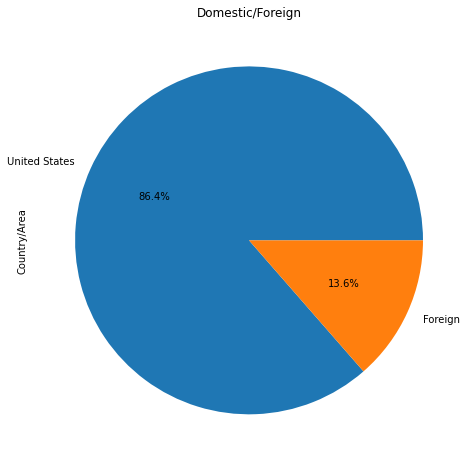

In [36]:
## Pie-Chart showing Domestic vs Foreign Inspection Count

plt.figure(figsize=(8,8))
country_df['Country/Area'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("Domestic/Foreign")
plt.show()

### Which state has more Inspections till now?

In [37]:
# ## Data pre-processing before generating visuals.

# state_codes = {
#     'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
#     'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
#     'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
#     'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
#     'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
#     'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
#     'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
#     'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
#     'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
#     'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
#     'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
#     'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
#     'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
#     'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
#     'Nevada': 'NV', 'Maine': 'ME', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI',
#     'Northern Mariana Islands':'NI','Guam':'GM','American Samoa':'AS'
# }

# us_df = merged_df[merged_df['Country/Area'] == 'United States']
# us_df['State Code'] = us_df['State'].apply(lambda x : state_codes[x])
# us_df.drop_duplicates(subset=['InspectionID'])

In [38]:
# ## Map showing State-wise Inspection Count
# fig = px.choropleth(us_df, locations='State Code', color=us_df['InspectionID'], color_continuous_scale='spectral_r', hover_name='State', locationmode='USA-states', labels={'InspectionID':'Inspection count'}, scope='usa')
# fig.show()

### Has Inspections decresed overtime?

In [39]:
## Number of Inspections Yearly

pd.DataFrame(merged_df['FiscalYear'].value_counts())

,FiscalYear
2011,54871
2012,50830
2010,46047
2013,42709
2014,40556
2017,39864
2015,39251
2016,37990
2018,36339
2009,36026


In [40]:
## Country-wise and Year-wise count of Inspections

byFiscalYear = pd.DataFrame(country_df.groupby('Country/Area').FiscalYear.value_counts())
byFiscalYear.unstack().T

Country/Area           Foreign  United States
           FiscalYear                        
FiscalYear 2009           1989          34037
           2010           2489          43558
           2011           4848          50023
           2012           6539          44291
           2013           6664          36045
           2014           6828          33728
           2015           7676          31575
           2016           7159          30831
           2017           6719          33145
           2018           6309          30030
           2019           6502          26781
           2020           2961          13912
           2021            236          12220
           2022            170           7039

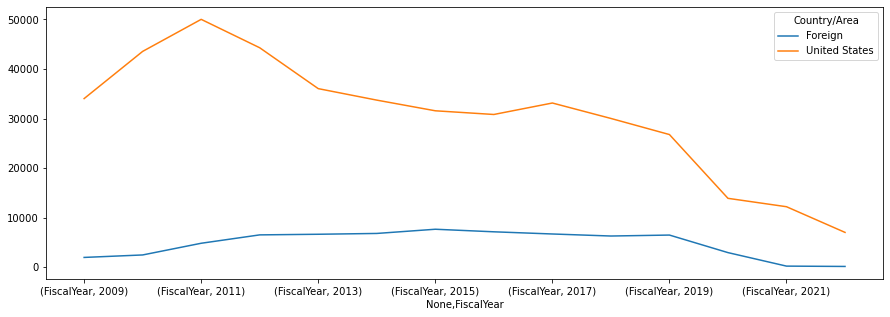

In [41]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15, 5]

# plt.figure(figsize=(50,50))
byFiscalYear.unstack().T.plot(kind='line')
plt.show()

In [42]:
## State-wise and Year-wise count of Inspections

byFiscalYear = pd.DataFrame(merged_df.groupby('FiscalYear').State.value_counts())
byFiscalYear.unstack().T

FiscalYear                        2009    2010    2011    2012    2013  \
      State                                                              
State -                         1989.0  2489.0  4848.0  6539.0  6664.0   
      Alabama                    293.0   284.0   300.0   261.0   322.0   
      Alaska                      80.0   138.0   172.0   194.0   171.0   
      American Samoa               2.0    32.0     5.0     NaN     2.0   
      Arizona                    345.0   315.0   374.0   435.0   386.0   
      Arkansas                    99.0   182.0   183.0   311.0   267.0   
      California                4352.0  6316.0  7251.0  5648.0  4314.0   
      Colorado                   755.0  1067.0  1138.0   970.0   753.0   
      Connecticut                306.0   406.0   437.0   456.0   448.0   
      Delaware                    83.0    74.0    82.0    50.0    74.0   
      District of Columbia        49.0    75.0    67.0    72.0    49.0   
      Florida                   3514.0  5038.0  5211.0  4467.0  3687.0   
      Georgia                    685.0  1139.0  1198.0   885.0   800.0   
      Guam                         5.0     NaN    34.0     NaN     7.0   
      Hawaii                     189.0   231.0   216.0   293.0   162.0   
      Idaho                      180.0   280.0   324.0   249.0   268.0   
      Illinois                  1360.0  1503.0  1955.0  1764.0  1276.0   
      Indiana                    488.0   666.0   580.0   611.0   598.0   
      Iowa                       197.0   251.0   391.0   468.0   357.0   
      Kansas                     169.0   366.0   472.0   358.0   276.0   
      Kentucky                   428.0   616.0   747.0   596.0   531.0   
      Louisiana                  313.0   376.0   669.0   430.0   322.0   
      Maine                      278.0   238.0   244.0   568.0   256.0   
      Maryland                   557.0   730.0   690.0   645.0   593.0   
      Massachusetts              983.0  1253.0  1657.0  1210.0   918.0   
      Michigan                  1175.0  1201.0  1220.0  1257.0   986.0   
      Minnesota                  964.0  1155.0  1149.0  1159.0   954.0   
      Mississippi                181.0   232.0   149.0   196.0   137.0   
      Missouri                   549.0   738.0   868.0   736.0   563.0   
      Montana                    201.0   141.0   195.0   164.0   168.0   
      Nebraska                   107.0   105.0   214.0   137.0   227.0   
      Nevada                     177.0   114.0   207.0   125.0   165.0   
      New Hampshire              148.0   176.0   156.0   227.0   133.0   
      New Jersey                1291.0  1436.0  1719.0  1562.0  1379.0   
      New Mexico                 218.0   182.0   310.0   138.0   141.0   
      New York                  2107.0  2418.0  2810.0  2845.0  2127.0   
      North Carolina            1260.0  1219.0   782.0   793.0   628.0   
      North Dakota               146.0   160.0   173.0   214.0   197.0   
      Northern Mariana Islands     7.0     NaN     NaN     NaN     NaN   
      Ohio                      1326.0  1449.0  1864.0  1363.0  1141.0   
      Oklahoma                   128.0   212.0   372.0   234.0   281.0   
      Oregon                     409.0   612.0   672.0   638.0   536.0   
      Pennsylvania              1221.0  1520.0  1556.0  1736.0  1379.0   
      Puerto Rico                707.0   557.0  1002.0   848.0   706.0   
      Rhode Island               215.0   232.0   219.0   164.0    89.0   
      South Carolina             371.0   357.0   225.0   299.0   210.0   
      South Dakota               103.0   129.0   144.0   144.0   199.0   
      Tennessee                  580.0   712.0   746.0   793.0   903.0   
      Texas                     1444.0  3051.0  3928.0  2629.0  1900.0   
      Utah                       347.0   537.0   695.0   484.0   532.0   
      Vermont                     75.0   106.0   126.0   259.0   131.0   
      Virgin Islands              13.0    13.0    29.0    57.0    15.0   
    

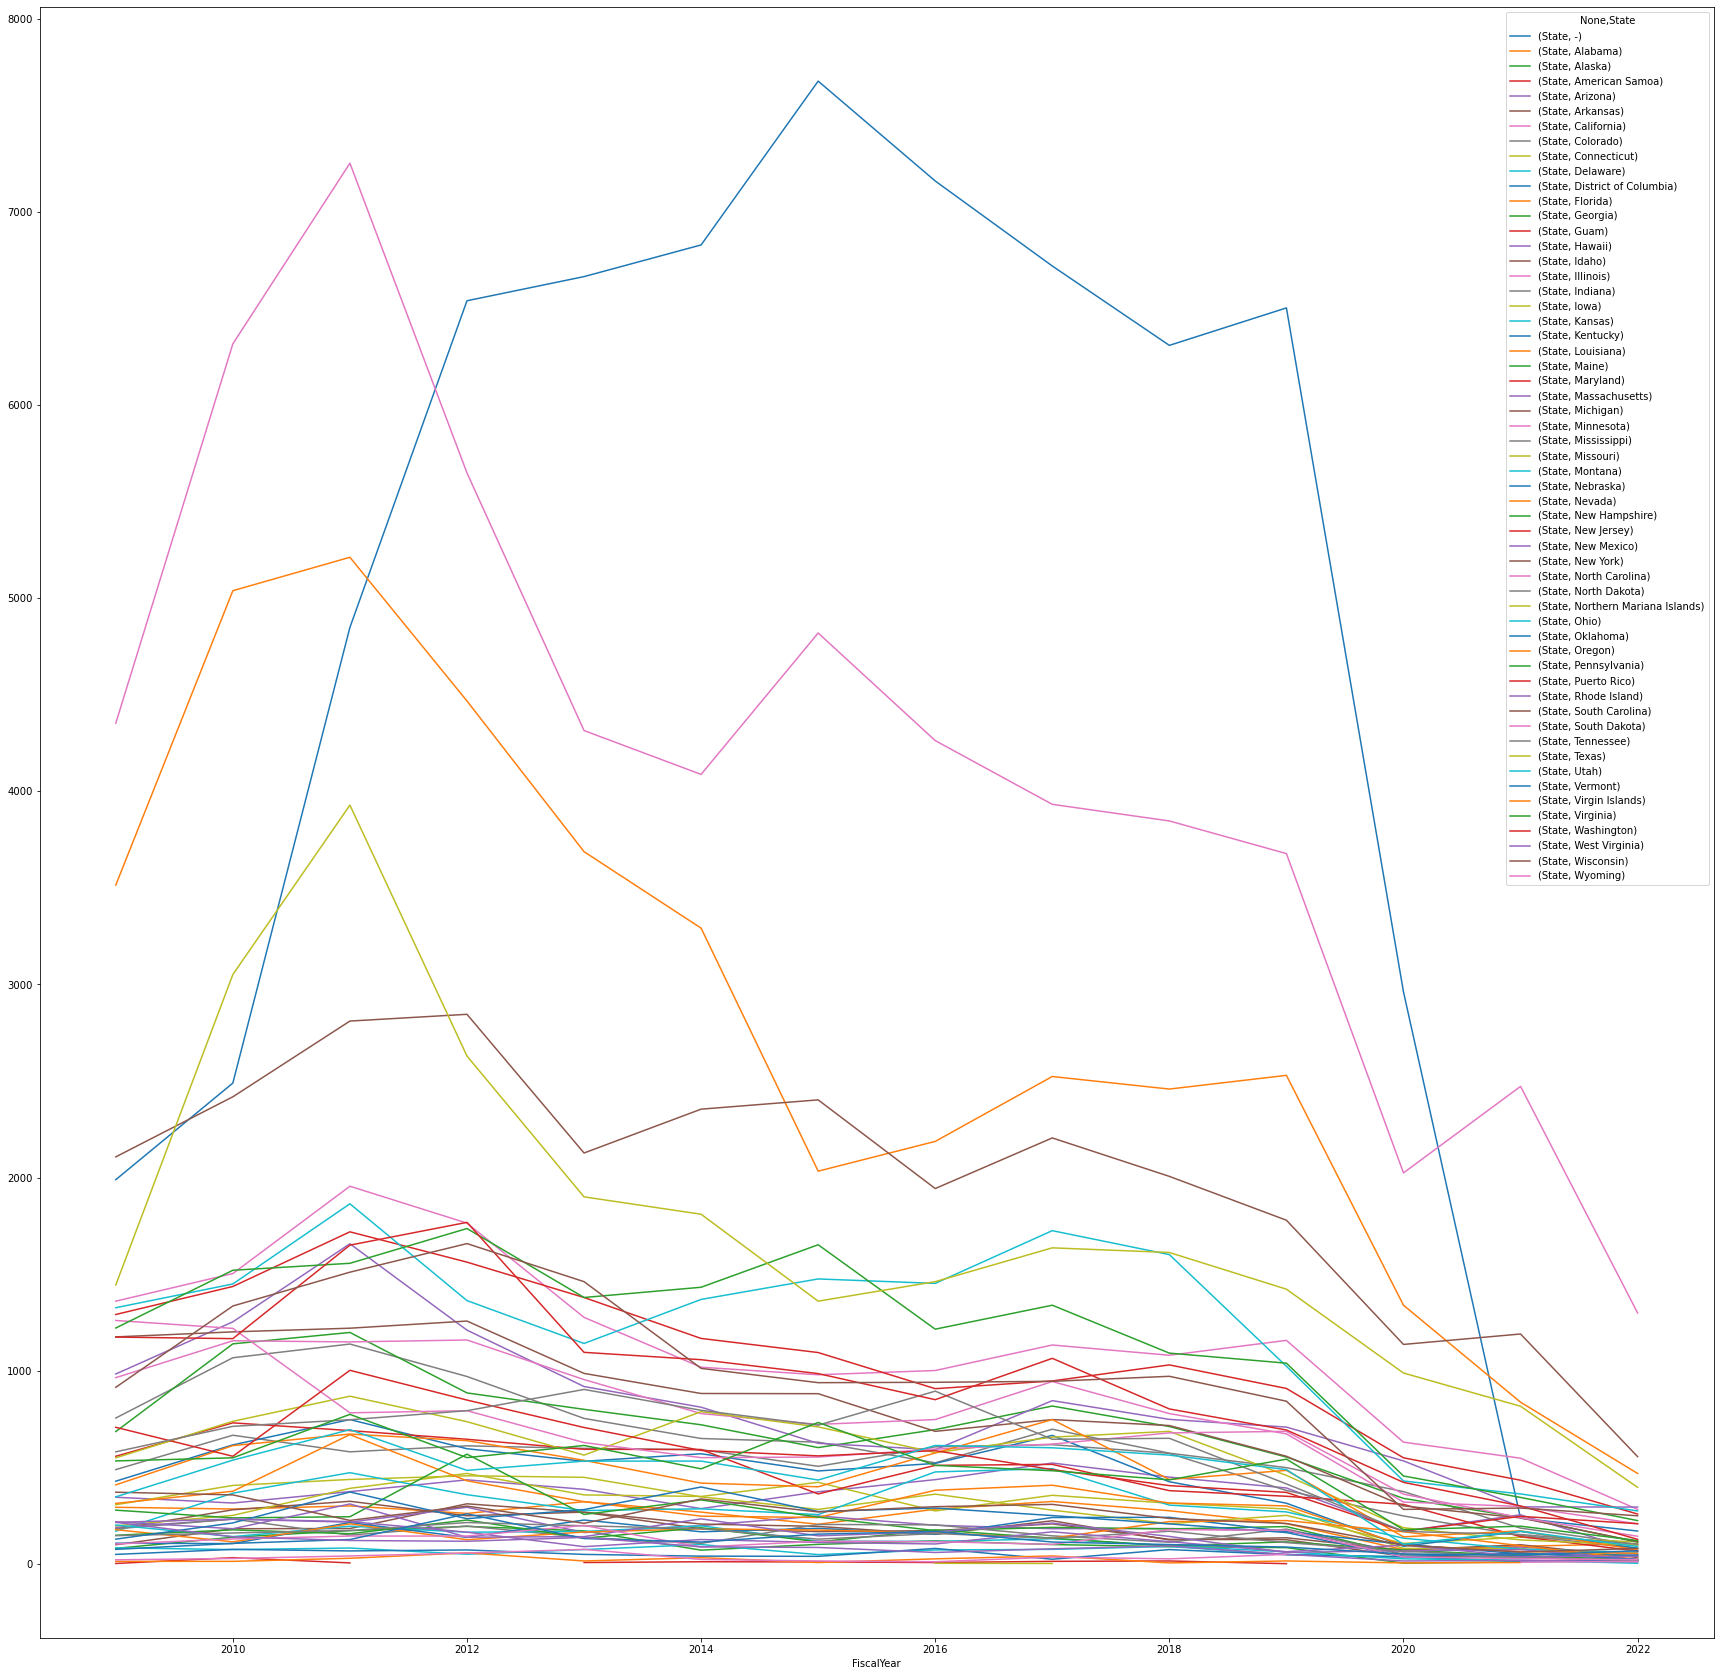

Double Click on Graph to view it properly.


In [43]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [30, 30]

# plt.figure(figsize=(50,50))
byFiscalYear.unstack().plot(kind='line')
plt.show()
print("Double Click on Graph to view it properly.")

##### Yes, Number of inspections has decresed overtime
    - Yearly -> Yes
    - Domestic/Foreign (Yearly) -> Yes
    - State-wise (Yearly) -> Yes

### Does Classification has any relation with Product Type or Project Area

In [44]:
## Classification-wise product type

byClassification = pd.DataFrame(merged_df.groupby('Classification').ProductType.value_counts())
byClassification.unstack().T

Classification              No Action Indicated (NAI)  \
            ProductType                                 
ProductType Biologics                           20193   
            Devices                             32550   
            Drugs                               15002   
            Food/Cosmetics                     110433   
            Tobacco                               495   
            Veterinary                          17454   

Classification              Official Action Indicated (OAI)  \
            ProductType                                       
ProductType Biologics                                  1308   
            Devices                                   15922   
            Drugs                                     10589   
            Food/Cosmetics                            25561   
            Tobacco                                      29   
            Veterinary                                 3656   

Classification              Voluntary Action Indicated (VAI)  
            ProductType                                       
ProductType Biologics                                  10410  
            Devices                                    49334  
            Drugs                                      35994  
            Food/Cosmetics                            133694  
            Tobacco                                      111  
            Veterinary                                 11569

<AxesSubplot:xlabel='None,ProductType'>

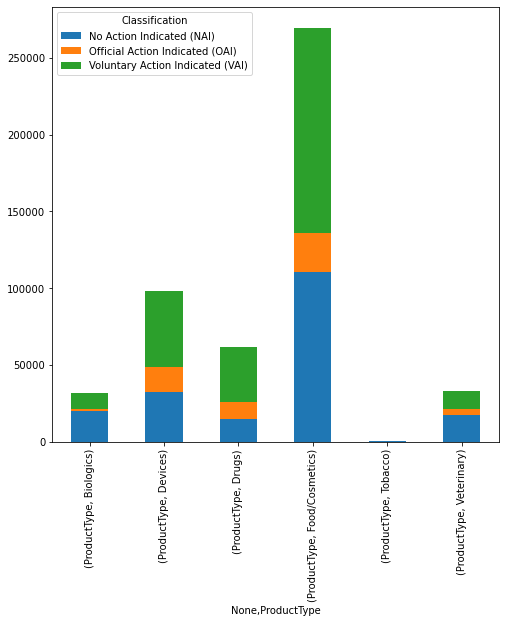

In [45]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [8, 8]

#plt.figure(figsize=(25,12))
byClassification.unstack().T.plot(kind='bar', stacked=True)

In [46]:
## Classification-wise Project Area

byClassification = pd.DataFrame(merged_df.groupby('Classification').ProjectArea.value_counts())
byClassification.unstack().T

Classification                                                  No Action Indicated (NAI)  \
            ProjectArea                                                                     
ProjectArea Bioresearch Monitoring                                                 9949.0   
            Blood and Blood Products                                              12471.0   
            Colors and Cosmetics Technology                                        1993.0   
            Compliance: Devices                                                   11585.0   
            Drug Quality Assurance                                                 8740.0   
            Food Composition, Standards, Labeling and Econ                        14926.0   
            Food and Color Additives Petition Review                               9508.0   
            Foodborne Biological Hazards                                          65845.0   
            Human Cellular, Tissue, and Gene Therapies                             5904.0   
            Molecular Biology and Natural Toxins                                     43.0   
            Monitoring of Marketed Animal Drugs, Feed, and ...                    17023.0   
            Over-the-Counter Drug Evaluation                                         19.0   
            Pesticides and Chemical Contaminants                                  10250.0   
            Postmarket Assurance: Devices                                         16972.0   
            Postmarket Surv. and Epidemiology                                        70.0   
            Pre-Approval Eval. of Animal Drugs and Food Add...                      138.0   
            Prescription Drug Advertising and Labelling                               8.0   
            Radiation Control and Health Safety Act                                1159.0   
            Technical Assistance: Food and Cosmetics                               7861.0   
            Tobacco Post-Market Activities                                          487.0   
            Tobacco Pre-Market Activities                                             6.0   
            Unapproved and Misbranded Drugs                                         256.0   
            Vaccines and Allergenic Products                                        914.0   

Classification                                                  Official Action Indicated (OAI)  \
            ProjectArea                                                                           
ProjectArea Bioresearch Monitoring                                                       1854.0   
            Blood and Blood Products                                                      404.0   
            Colors and Cosmetics Technology                                               284.0   
            Compliance: Devices                                                          9803.0   
            Drug Quality Assurance                                                       8452.0   
            Food Composition, Standards, Labeling and Econ                               8371.0   
            Food and Color Additives Petition Review                                      277.0   
            Foodborne Biological Hazards                                                16071.0   
            Human Cellular, Tissue, and Gene Therapies                                    737.0   
            Molecular Biology and Natural Toxins                                            NaN   
            Monitoring of Marketed Animal Drugs, Feed, and ...                           3539.0   
            Over-the-Counter Drug Evaluation                                               27.0   
            Pesticides and Chemical Contaminants                                          345.0   
            Postmarket Assurance: Devices                                                5080.0   
            Postmarket Surv. and Epidemiology                                             

Double click on the graphs to see them properly.


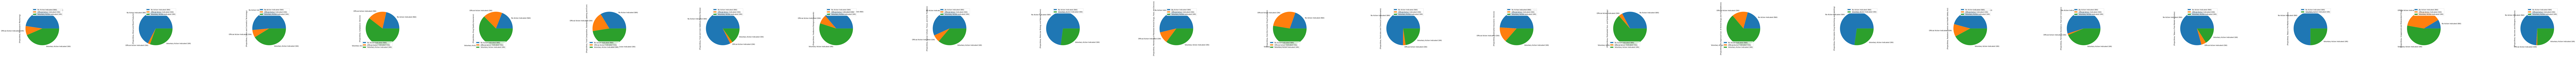

In [47]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [300, 5]

#plt.figure(figsize=(25,12))
byClassification.unstack().plot(kind='pie', subplots=True)
print("Double click on the graphs to see them properly.")

##### Yes, Classifications are changing according to Product Type and Project area
    Product Type - Observations can see that some of the product type such as Food/Cosmetic has higher number of VAI (Voluntary Action Indicated) Classification.
    
    Project Area - It can be seen from the observations that majority of Project Areas has VAI (Voluntary Action Indicated) while there are some outliers such as Tobacco Post-Market Activities, Pesticides and Chemical Contaminants, Prescription Drug Advertising and Labelling and Vaccines and Allergenic Products where NAI (No Action Indicated) is on higher end.

### Does Classification difffers state-wise

In [48]:
## State-wise and Year-wise count of Inspections

byClassification = pd.DataFrame(merged_df.groupby('Classification').State.value_counts())
byClassification.unstack().T

Classification                  No Action Indicated (NAI)  \
      State                                                 
State -                                           22142.0   
      Alabama                                      1837.0   
      Alaska                                        640.0   
      American Samoa                                 27.0   
      Arizona                                      2151.0   
      Arkansas                                      962.0   
      California                                  21697.0   
      Colorado                                     2547.0   
      Connecticut                                  1241.0   
      Delaware                                      421.0   
      District of Columbia                          259.0   
      Florida                                     15246.0   
      Georgia                                      4341.0   
      Guam                                           38.0   
      Hawaii                                       1089.0   
      Idaho                                        1096.0   
      Illinois                                     6638.0   
      Indiana                                      2768.0   
      Iowa                                         2232.0   
      Kansas                                       2113.0   
      Kentucky                                     2975.0   
      Louisiana                                    2279.0   
      Maine                                         782.0   
      Maryland                                     2552.0   
      Massachusetts                                3411.0   
      Michigan                                     4152.0   
      Minnesota                                    5681.0   
      Mississippi                                  1113.0   
      Missouri                                     3520.0   
      Montana                                       909.0   
      Nebraska                                     1360.0   
      Nevada                                        868.0   
      New Hampshire                                 697.0   
      New Jersey                                   6090.0   
      New Mexico                                    643.0   
      New York                                     7436.0   
      North Carolina                               4068.0   
      North Dakota                                 1588.0   
      Northern Mariana Islands                       15.0   
      Ohio                                         8621.0   
      Oklahoma                                     1450.0   
      Oregon                                       2663.0   
      Pennsylvania                                 7627.0   
      Puerto Rico                                  1767.0   
      Rhode Island                                  392.0   
      South Carolina                               1507.0   
      South Dakota                                 1289.0   
      Tennessee                                    4161.0   
      Texas                                        9980.0   
      Utah                                         1655.0   
      Vermont                                       510.0   
      Virgin Islands                                 35.0   
      Virginia                                     2878.0   
      Washington                                   4852.0   
      West Virginia                                 531.0   
      Wisconsin                                    6469.0   
      Wyoming                                       116.0   

Classification                  Official Action Indicated (OAI)  \
      State                                                       
State -                                                  7808.0   
      Alabama                                             435.0   
      Alaska                                               12.0   
      American Samoa                                       13.0  

Double click on the graphs to see them properly.


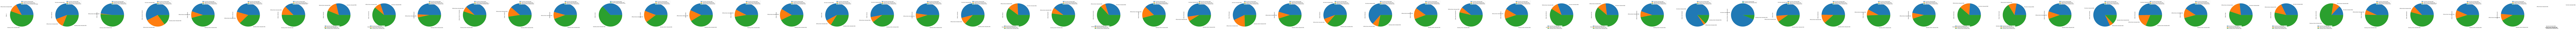

In [49]:
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [600, 7]

#plt.figure(figsize=(25,12))
byClassification.unstack().plot(kind='pie', subplots=True)
print("Double click on the graphs to see them properly.")

##### Yes, Classification differes state-wise.
    This can be results of number of inspections in that state. If the number of inspections are high then there are diverse classifications.